In [1]:
import numpy as np
import pandas as pd
import scienceplots
import matplotlib.pyplot as plt
from datasets import load_dataset, concatenate_datasets
from itertools import combinations, product
from huggingface_hub import login as hf_login
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [2]:
ds = load_dataset("beanham/spatial_join_dataset")
train=ds['train']
test=ds['test']
positive=train.filter(lambda x: x['label']==1)
negative=train.filter(lambda x: x['label']==0)
train_pd=train.to_pandas()
test=test.to_pandas()

---

## Training Distribution

## Angle Degrees

In [3]:
name='min_angle'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 0.9224326076008726
Mean: 24.358718314319734
Max: 89.98805846135882
STD: 34.120410293675114


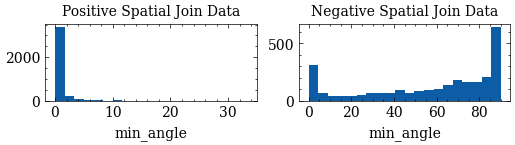

In [4]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel("min_angle")
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel("min_angle")
#plt.savefig(f"../../visualizations/join_task_min_angle_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

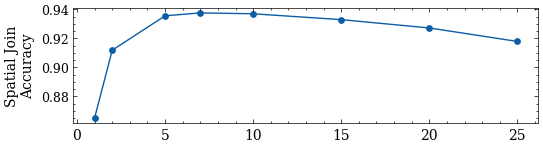

In [5]:
metrics=[1,2,5,7,10,15,20,25]
train_gt=np.array(train['label'])
accuracy=[]
for m in metrics:
    pred=np.array(train['min_angle'])<=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.yticks(fontsize=9)
plt.ylabel('Spatial Join\nAccuracy', fontsize=10)
#plt.xlabel('min_angle', fontsize=12)
#plt.savefig(f"../../visualizations/join_task_min_angle_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

---

## Euclidean Distance

In [7]:
name='min_euc_dist'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.0
Median: 6.884390860713215
Mean: 5.5110303100771985
Max: 9.997677095262258
STD: 3.606794913883234


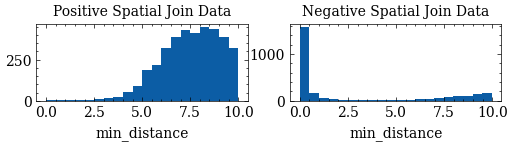

In [8]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('min_distance')
#plt.savefig(f"../../visualizations/join_task_min_distance_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

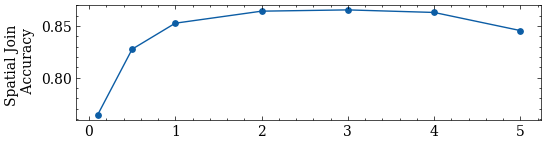

In [9]:
metrics=[0.1,0.5,1,2,3,4,5]
accuracy=[]
for m in metrics:
    pred=np.array(train['min_euc_dist'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
#plt.xlabel('min_distance', fontsize=12)
#plt.savefig(f"../../visualizations/join_task_min_distance_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

## Max_Area

In [13]:
name='max_area'
data=train
print('Min:', np.min(data[name]))
print('Median:', np.median(data[name]))
print('Mean:', np.mean(data[name]))
print('Max:', np.max(data[name]))
print('STD:', np.std(data[name]))

Min: 0.013775047447748759
Median: 0.5029537112114839
Mean: 0.4717375348386345
Max: 1.0000000000000002
STD: 0.17118337426491753


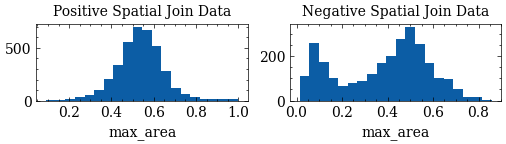

In [14]:
title_size=10
plt.style.use('science')
plt.rc('text', usetex=False)
plt.figure(figsize=(6,1))
plt.subplot(1, 2, 1)
plt.hist(positive[name], bins=20)
plt.title('Positive Spatial Join Data', fontsize=title_size)
plt.xlabel('max_area')
plt.subplot(1, 2, 2)
plt.hist(negative[name], bins=20)
plt.title('Negative Spatial Join Data', fontsize=title_size)
plt.xlabel('max_area')
#plt.savefig(f"../../visualizations/join_task_max_area_distribution.png", bbox_inches='tight',pad_inches=0, dpi=600)
pass

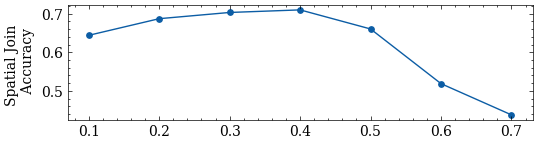

In [15]:
metrics=[0.1,0.2,0.3,0.4,0.5,0.6,0.7]
accuracy=[]
for m in metrics:
    pred=np.array(train['max_area'])>=m
    accuracy.append(accuracy_score(train_gt, pred))
plt.figure(figsize=(6,1.5))
plt.plot(metrics,accuracy,label='accuracy')
plt.scatter(metrics, accuracy,s=15)
plt.ylabel('Spatial Join \n Accuracy', fontsize=10)
#plt.xlabel('max_area', fontsize=12)
#plt.savefig(f"../../visualizations/join_task_max_area_train_acc.png", bbox_inches='tight',pad_inches=0.01, dpi=600)
pass    

## Test Inference

In [17]:
def metric_calculation(pred, gt):    
    acc=accuracy_score(gt, pred)
    f1=f1_score(gt, pred, average='macro')
    confusion=confusion_matrix(gt, pred)
    fpr=confusion[0,1]/len(gt) ## predict to be 1; actual 0
    fnr=confusion[1,0]/len(gt) ## predict to be 0; actual 1
    return acc, f1, fpr, fnr

In [18]:
single_feature=[]
gt=np.array(test['label'])
for metric in ['min_angle', 'min_euc_dist', 'max_area']:
    if metric == 'min_angle':
        for v in [1,2,5,10,20]:
            pred=np.array(test[metric])<=v
            results=metric_calculation(pred, gt)
            single_feature.append([metric, v, results[0]])
    elif metric == 'min_euc_dist':
        for v in [1,2,3,4,5]:
            pred=np.array(test[metric])>=v
            results=metric_calculation(pred, gt)
            single_feature.append([metric, v, results[0]])
    else:
        for v in [0.1,0.2,0.3,0.4,0.5]:
            pred=np.array(test[metric])>=v
            results=metric_calculation(pred, gt)
            single_feature.append([metric, v, results[0]])
single_feature=pd.DataFrame(single_feature, columns=['feature', 'value', 'acc'])
single_feature

,feature,value,acc
0,min_angle,1.0,0.867
1,min_angle,2.0,0.908
2,min_angle,5.0,0.946
3,min_angle,10.0,0.948
4,min_angle,20.0,0.934
5,min_euc_dist,1.0,0.838
6,min_euc_dist,2.0,0.847
7,min_euc_dist,3.0,0.851
8,min_euc_dist,4.0,0.852
9,min_euc_dist,5.0,0.835


In [21]:
## combination (angle, dist)
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
test_gt=np.array(test['label'])
combs=list(product(angles, distances))
accuracy=[]
for a,d in combs:
    pred=(np.array(test['min_euc_dist'])>=d)&(np.array(test['min_angle'])<=a)
    accuracy.append([a,d,accuracy_score(test_gt, pred)])
angle_distance=pd.DataFrame(accuracy,columns=['angle','distance','acc'])

In [22]:
## combination (angle, area)
angles=[1,2,5,10,20]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(angles, max_area))
accuracy=[]
for a,m in combs:
    pred=(np.array(test['max_area'])>=m)&(np.array(test['min_angle'])<=a)
    accuracy.append([a,m,accuracy_score(test_gt, pred)])
angle_area=pd.DataFrame(accuracy,columns=['angle','area','acc'])

In [24]:
## combination (dist, area)
distances=[1,2,3,4,5]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(distances, max_area))
accuracy=[]
for d,m in combs:
    pred=(np.array(test['max_area'])>=m)&(np.array(test['min_euc_dist'])>=d)
    accuracy.append([d,m,accuracy_score(test_gt, pred)])
distance_area=pd.DataFrame(accuracy,columns=['distance','area','acc'])

In [29]:
## all
angles=[1,2,5,10,20]
distances=[1,2,3,4,5]
max_area=[.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(angles, distances, max_area))
accuracy=[]
for a,d,m in combs:
    pred=(np.array(test['min_euc_dist'])>=d)&(np.array(test['min_angle'])<=a)&(np.array(test['max_area'])>=m)
    accuracy.append([a,d,m,accuracy_score(test_gt, pred)])
accuracy_all=pd.DataFrame(accuracy, columns=['angle','distance','area','acc'])

In [57]:
## all
angles=[0,1,2,5,10,20]
distances=[0,1,2,3,4,5]
max_area=[0,.1,.2,.3,.4,.5]
test_gt=np.array(test['label'])
combs=list(product(angles, distances, max_area))
combs=combs[1:]
accuracy=[]
for a,d,m in combs:
    ## single angle
    if ((a!=0) & (d==0) & (m==0)):
        pred=np.array(test['min_angle'])<=a
    ## single distance
    elif ((a==0) & (d!=0) & (m==0)):
        pred=np.array(test['min_euc_dist'])>=d
    ## single area
    elif ((a==0) & (d==0) & (m!=0)):
        pred=np.array(test['max_area'])>=m
    ## angle & distance
    elif ((a!=0) & (d!=0) & (m==0)):
        pred=(np.array(test['min_angle'])<=a)&(np.array(test['min_euc_dist'])>=d)
    ## angle & area
    elif ((a!=0) & (d==0) & (m!=0)):
        pred=(np.array(test['min_angle'])<=a)&(np.array(test['max_area'])>=m)
    ## distance & area
    elif ((a==0) & (d!=0) & (m!=0)):
        pred=(np.array(test['max_area'])>=m)&(np.array(test['min_euc_dist'])>=d)
    else:
        pred=(np.array(test['min_euc_dist'])>=d)&(np.array(test['min_angle'])<=a)&(np.array(test['max_area'])>=m)
    accuracy.append([a,d,m,accuracy_score(test_gt, pred)])
accuracy_all=pd.DataFrame(accuracy,columns=['angle','distance','area','acc'])

In [66]:
accuracy_all[ (accuracy_all['angle']!=0) & (accuracy_all['distance']!=0) & (accuracy_all['area']==0.5)]

,angle,distance,area,acc
46,1,1,0.5,0.733
52,1,2,0.5,0.733
58,1,3,0.5,0.731
64,1,4,0.5,0.730
70,1,5,0.5,0.715
82,2,1,0.5,0.763
88,2,2,0.5,0.763
94,2,3,0.5,0.761
100,2,4,0.5,0.760
106,2,5,0.5,0.741
